# Customizing Matplotlib: Configurations and Stylesheets

Matplotlib's default plot settings are not always what we want, so the ability to customize default settings helps brings the package inline with our own aesthetic preferences.

In this notebook we'll walk through some of Matplotlib's runtime configuration (rc) options, and take a look at the _stylesheets_ feature, which contains some nice sets of default configurations.

## Plot Customization by Hand

We've already seen how it's possible to tweak individual plot settings in order to end up with something that looks a bit better than the default. It's possible to do these customization for each individual plot. For example, here is a fairly drab default histogram:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
# Change facecolor of the figure so that the notebook looks nicer
plt.rcParams['figure.facecolor'] = 'white'

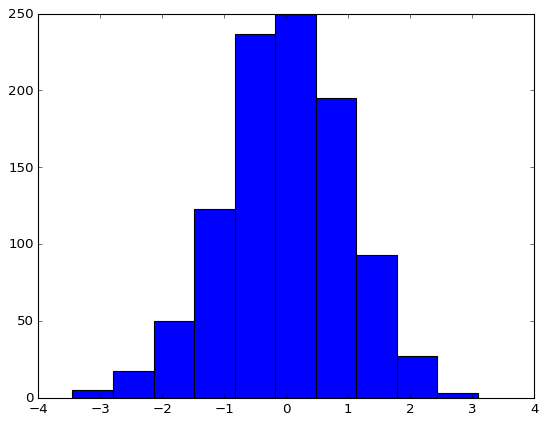

In [2]:
x = np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot:

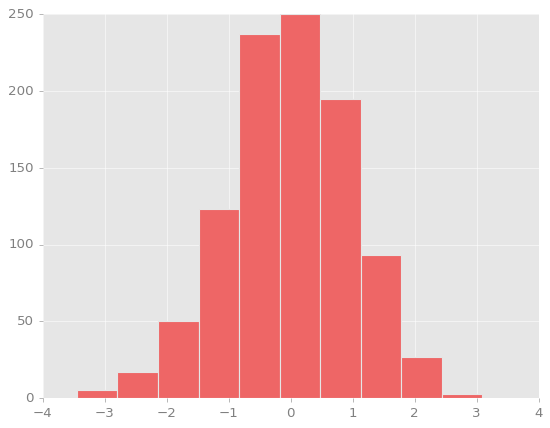

In [3]:
# use a gray background
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
# `colors` changes the color of both the tick and it's label
# for different colors between the two, we could set `color` and `labelcolor`
ax.tick_params(colors='gray', direction='out')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

This looks better, but took a whole lot of effort to achieve. Fortunately, there is a way to adjust these defaults once in a way that will work for all plots.

## Changing the Defaults: `rcParams`

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element we create. This configuration can be adjusted at any time using the `plt.rc` routine. Let's see what it looks like to modify the rc parameters so that our default plot looks similar to what did before.

We'll start by saving a copy of the current `rcParams` dictionary, so we can easily reset the changes we make:

In [4]:
IPython_default = plt.rcParams.copy()

Now we can use the `plt.rc` function to change some of these settings:

In [5]:
from matplotlib import cycler

colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

With these settings defined, we can now create a plot and see our settings in action:

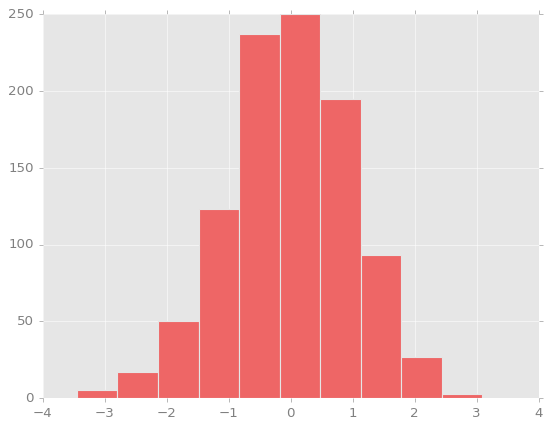

In [6]:
plt.hist(x);

This is what a simple line plots looks like with these rc parameters:

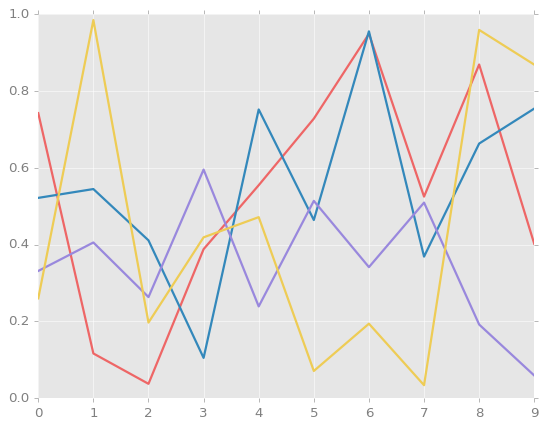

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

It's possible to save these custom parameters in a _.matplotlibrc_ file for the sake of ease of reuse. The [Matplotlib documentation](https://matplotlib.org/tutorials/introductory/customizing.html) details this process. That said, it is often much easier to customize Matplotlib using its stylesheets instead.

## Stylesheets

Matplotlib has a very convenient `style` module, which includes a number of default stylesheets, as well as the ability to create and package our own styles. 

The stylesheets included by default are extremely useful. The list of available styles are listed in `plt.style.available`:

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

The basic way to switch to a stylesheet is to call

```python
plt.style.use('stylename')
```

But keep in mind that this will change the style for the rest of the session. Alternatively, we can use the style context manager, which sets a style temporarily within the context:

```python
with plt.style.context('stylename'):
    make_a_plot()
```

Let's a create a function that will make two basic types of plot, which we'll use to explore how these plots look using the various built-in styles:

In [9]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Classic style

The `classic` style used to be the default on previous versions of Matplotlib. Let's see how it looks:

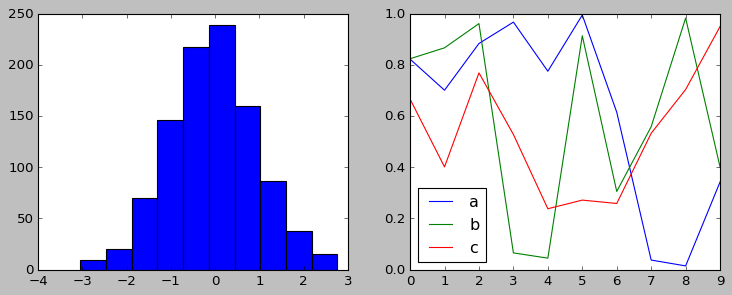

In [10]:
with plt.style.context('classic'):
    hist_and_lines()

### Default style

The current `default` style replaced the `classic` style on newer versions. This is what the notebook would look like on newer versions if we do not set the style manually:

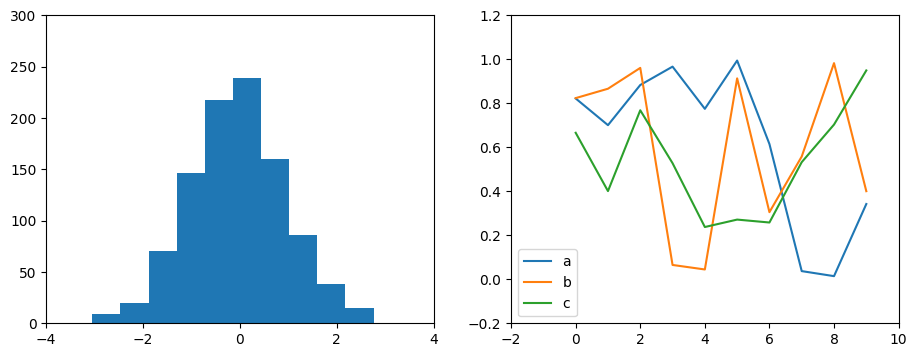

In [11]:
with plt.style.context('default'):
    hist_and_lines()

### FiveThirtyEight style

The `fivethirtyeight` style mimics the graphics found on the [FiveThirtyEight website](https://fivethirtyeight.com/)

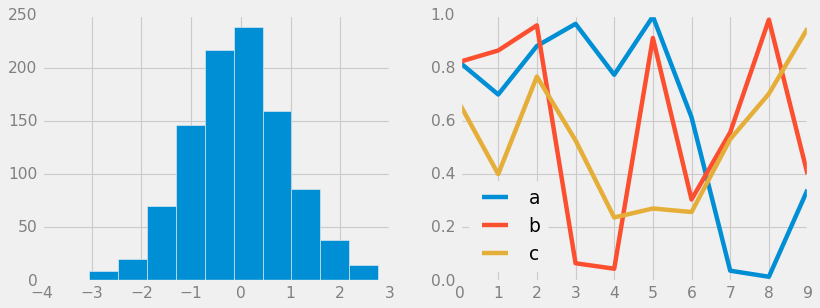

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

The `ggplot` package in the R language is a very popular visualization tool. The `ggplot` style mimics the default styles from that package:

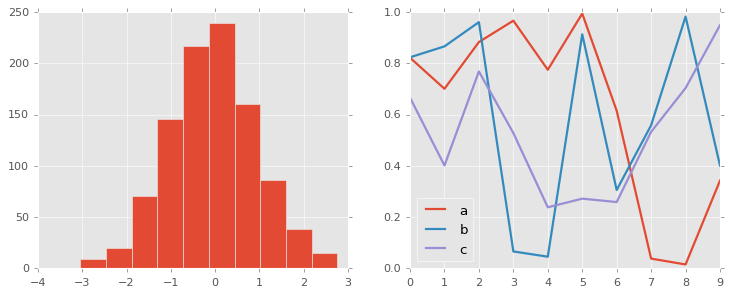

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers style

There is a very nice shorts online book called [Probabilistic Programming and Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); it features figures created with Matplotlib, and uses a nice set of rc parameters to create a visually-appealing style throughout the book. This style is reproduced in the `bmh` stylesheet:

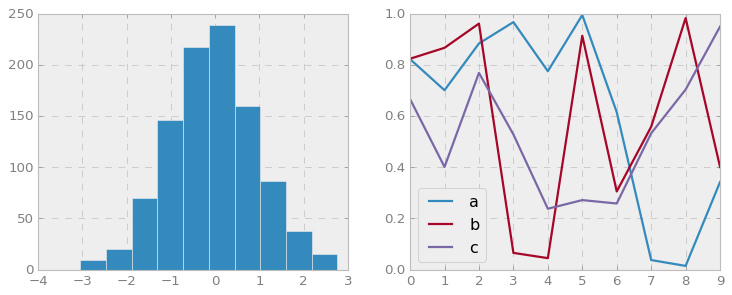

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

For cases where it's useful to have a dark rather than light background, the `dark_background` style can be very useful:

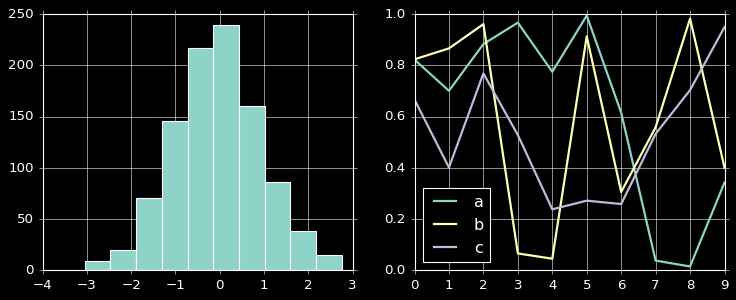

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

When preparing figures that cannot be presented in full color, the `grayscale` style can prove useful:

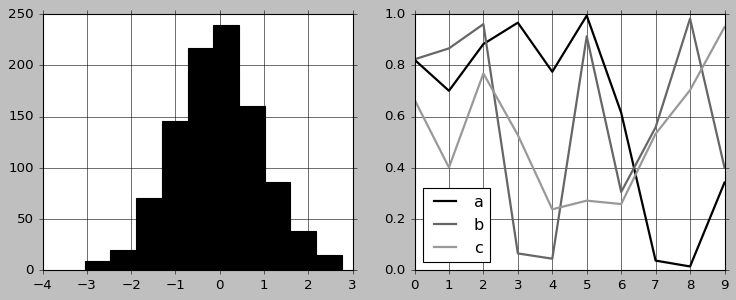

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib also has stylesheets inspired by the Seaborn library. We can set the style by calling the `seaborn.set()` function, as we can see here:

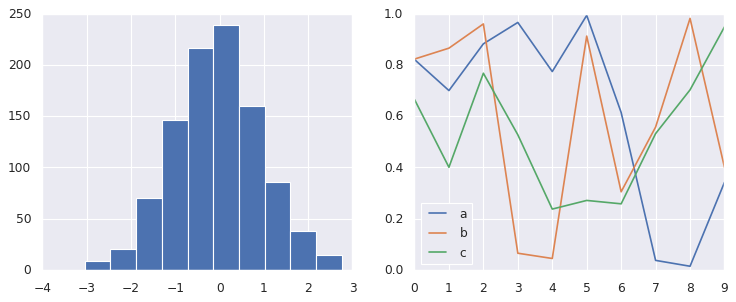

In [17]:
import seaborn as sns
sns.set()
hist_and_lines()